In [1]:
import numpy as np
import Load_ActionsDataset
import cv2

dict_keys(['action_mad', 'force_mad', 'action_cup_and_mad', 'action_n_force_cup_and_mad', 'action_stone_and_mad', 'action_n_force_stone_and_mad', 'action_sponge_and_mad', 'action_n_force_sponge_and_mad', 'action_spoon_and_mad', 'action_n_force_spoon_and_mad', 'action_knife_and_mad', 'action_n_force_knife_and_mad', 'action_cup_fer_mad', 'action_n_force_cup_fer_mad', 'action_stone_fer_mad', 'action_n_force_stone_fer_mad', 'action_sponge_fer_mad', 'action_n_force_sponge_fer_mad', 'action_spoon_fer_mad', 'action_n_force_spoon_fer_mad', 'action_knife_fer_mad', 'action_n_force_knife_fer_mad', 'action_cup_gui_mad', 'action_n_force_cup_gui_mad', 'action_stone_gui_mad', 'action_n_force_stone_gui_mad', 'action_sponge_gui_mad', 'action_n_force_sponge_gui_mad', 'action_spoon_gui_mad', 'action_n_force_spoon_gui_mad', 'action_knife_gui_mad', 'action_n_force_knife_gui_mad', 'action_cup_mic_mad', 'action_n_force_cup_mic_mad', 'action_stone_mic_mad', 'action_n_force_stone_mic_mad', 'action_sponge_mic_m

# Dataset Actions

In [2]:
mad= Load_ActionsDataset.load_dataset_mad(spec='xfy')   #Lista con 4 elementos: video, fuerza, etiqueta, metadata
haf = Load_ActionsDataset.load_dataset_haf(spec='xfy')  #Lista con 4 elementos: video, fuerza, etiqueta, metadata

reading datasets:
    using objects: ['cup', 'stone', 'sponge', 'spoon', 'knife']
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/cup_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/stone_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/sponge_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/spoon_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/knife_db.json
Done
reading datasets:
    using objects: ['cup', 'fork', 'knife', 'sponge']
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/HAF/fbr_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/HAF/fbr2_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset

In [3]:
clases, reps = np.unique( np.array(mad[2]),return_counts = True)
for valor, cant in zip(clases,reps):
    print(' El valor', valor, 'se repite', cant, ' veces')
#Hay 25 valores debido a las 25 clases que tiene el dataset mad

 El valor 0 se repite 25  veces
 El valor 1 se repite 25  veces
 El valor 2 se repite 25  veces
 El valor 3 se repite 25  veces
 El valor 4 se repite 25  veces
 El valor 5 se repite 27  veces
 El valor 6 se repite 27  veces
 El valor 7 se repite 27  veces
 El valor 8 se repite 27  veces
 El valor 9 se repite 27  veces
 El valor 10 se repite 25  veces
 El valor 11 se repite 25  veces
 El valor 12 se repite 25  veces
 El valor 13 se repite 26  veces
 El valor 14 se repite 24  veces
 El valor 15 se repite 25  veces
 El valor 16 se repite 25  veces
 El valor 17 se repite 25  veces
 El valor 18 se repite 25  veces
 El valor 19 se repite 25  veces
 El valor 20 se repite 25  veces
 El valor 21 se repite 25  veces
 El valor 22 se repite 25  veces
 El valor 23 se repite 25  veces
 El valor 24 se repite 25  veces


In [30]:
mad[0][0].shape

(117, 4096)

In [5]:
example_vid = mad[0][0].copy()
example_vid = np.reshape(example_vid,(117,64,64),order='C')
example_vid = (example_vid - example_vid.min())/(example_vid.max()-example_vid.min())*255
example_vid = example_vid.astype(np.uint8)
print(example_vid.max())

255


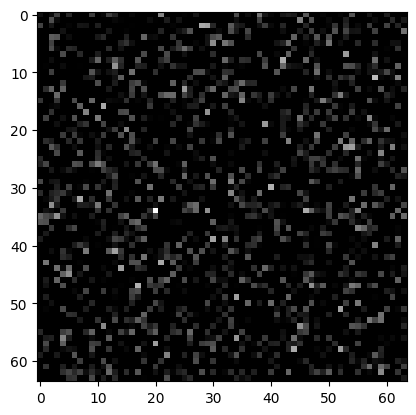

In [39]:
import matplotlib.pyplot as plt
plt.imshow(mad[0][20][10].reshape(64,64),'gray')

In [31]:
size = example_vid[0].shape
output_filename = "video_prueba.mp4"

# Crear un objeto VideoWriter con el nombre de archivo de salida, el códec, la tasa de fotogramas y las dimensiones del video
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec para formato MP4
fps = 15  # Tasa de fotogramas por segundo
output_video = cv2.VideoWriter(output_filename, fourcc, fps, size,isColor=False)

array = np.random.randint(0, 256, size=(114, 64, 64), dtype=np.uint8)
# Iterar sobre cada frame en la matriz y escribirlo en el video
for frame in example_vid:
    output_video.write(frame)

# Liberar recursos y cerrar el archivo de video
output_video.release()

In [7]:
# Define las dimensiones del video y el nombre del archivo de salida
width, height = 64, 64
output_file = 'video_salida_2.mp4'

# Inicializa el objeto VideoWriter de OpenCV
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, 30.0, (width, height))

# Itera sobre cada frame del numpy array y escribe el frame en el video
for frame in example_vid:
    # Redimensiona el frame al tamaño deseado
    frame = frame.reshape((width, height))
    
    # Convierte el frame en un objeto de imagen (para OpenCV)
    frame_img = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    
    # Escribe el frame en el video
    out.write(frame_img)

# Liberar recursos
out.release()


In [8]:
mad[3][0]

{'sub_id': 4,
 'subject': 'and',
 'object': 'cup',
 'segment_id': 0,
 'start_frame': 45,
 'touch_frame': 84,
 'end_frame': 161,
 'start_fid': 0,
 'touch_fid': 39,
 'end_fid': 116,
 'seq_len': 117,
 'preseq_len': 40,
 'attention_type': 1,
 'test_flag': False}

In [9]:
print(mad[1][4].shape)

(102, 4)


# Dataset DVS_gesture

In [7]:
import torch
import sys
import torch.nn.functional as F
import numpy as np
import wandb
from spikingjelly.activation_based import functional, surrogate, neuron
from spikingjelly.activation_based.model import parametric_lif_net
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture
from spikingjelly.datasets import play_frame
from torch.utils.tensorboard import SummaryWriter
import time
import os
import datetime

#Localización del dataset de DVSGesture
data_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset'
#Time-step
T = 16
train_set = DVS128Gesture(root=data_dir, train=True, data_type='frame', frames_number=T, split_by='number')
test_set = DVS128Gesture(root=data_dir, train=False, data_type='frame', frames_number=T, split_by='number')

The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.


In [3]:
from torch.utils.data import ConcatDataset
data_set = ConcatDataset([train_set,test_set])

In [10]:
data_set[0]

(array([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 1.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 1., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 2.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ...

In [15]:
class k:
    def __init__(self, v = 2):
        self.v = v
        self.n = 4


def funcion(k):
    k.n += 1
    return 9

object = k()
funcion(object)
print(object.n)

5


In [11]:
from spikingjelly.activation_based.model.sew_resnet import sew_resnet18
from spikingjelly.activation_based import functional, surrogate, neuron, layer
net = sew_resnet18(spiking_neuron=neuron.LIFNode,num_classes = 11, surrogate_function=surrogate.ATan(), detach_reset=True,cnf='ADD',zero_init_residual=True)


In [23]:
len(net._parameters)

0

Esto no me funciona:

In [12]:
example_vid_2 = train_set[0][0].copy()

size = example_vid_2[0].shape[-2:]
output_filename = "video_prueba_2.mp4"

# Crear un objeto VideoWriter con el nombre de archivo de salida, el códec, la tasa de fotogramas y las dimensiones del video
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec para formato MP4
fps = 2  # Tasa de fotogramas por segundo
output_video = cv2.VideoWriter(output_filename, fourcc, fps, size)

# Iterar sobre cada frame en la matriz y escribirlo en el video
for frame in example_vid_2:
    frame_bgr = np.zeros((size[0],size[1],3),dtype = np.uint8)
    frame_bgr[:,:,1] = frame[0,:,:]
    frame_bgr[:,:,2] = frame[1,:,:]
    output_video.write(frame_bgr)

# Liberar recursos y cerrar el archivo de video
output_video.release()

In [13]:
pwd = os.getcwd()
print(os.path.join(pwd,'hola','hola2'))

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/hola/hola2


In [11]:
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture
root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/extract/DvsGesture/user01_fluorescent.aedat'
k_gesture = DVS128Gesture.load_origin_data(root)

In [14]:
k_gesture['t']

array([ 80046394,  80046412,  80046414, ..., 194216337, 194216353,
       194216418])

# Dataset Animals DVS

In [15]:
import spikingjelly.datasets

aedat_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset/extract/Animals'
k = 0
for archivo in os.listdir(aedat_dir):
    if archivo.endswith('.aedat'):
        print(k,archivo,end='\n\n')
        k += 1
print(k)

0 user00_indoor.aedat

1 user07_indoor.aedat

2 user20_sunlight.aedat

3 user12_indoor.aedat

4 user30_imse.aedat

5 user15_indoor.aedat

6 user47_dc.aedat

7 user46_dc.aedat

8 user29_imse.aedat

9 user21_sunlight.aedat

10 user14_indoor.aedat

11 user13_indoor.aedat

12 user06_indoor.aedat

13 user50_dc.aedat

14 user51_dc.aedat

15 user01_indoor.aedat

16 user24_sunlight.aedat

17 user32_imse.aedat

18 user57_dc.aedat

19 user56_dc.aedat

20 user23_sunlight.aedat

21 user22_sunlight.aedat

22 user37_dc.aedat

23 user36_dc.aedat

24 user26_imse.aedat

25 user40_dc.aedat

26 user41_dc.aedat

27 user28_imse.aedat

28 user53_dc.aedat

29 user52_dc.aedat

30 user34_imse.aedat

31 user08_indoor.aedat

32 user19_sunlight.aedat

33 user25_imse.aedat

34 user59_dc.aedat

35 user58_dc.aedat

36 user09_indoor.aedat

37 user44_dc.aedat

38 user45_dc.aedat

39 user18_sunlight.aedat

40 user39_dc.aedat

41 user38_dc.aedat

42 user31_imse.aedat

43 user35_dc.aedat

44 user43_dc.aedat

45 user42_dc

In [1]:
from Datasets import DVSAnimals

data_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset'
T=16
data = DVSAnimals(data_dir,train=True, data_type='frame', frames_number=T, split_by='number')

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/frames_number_16_split_by_number] already exists.


In [2]:
data.class_to_idx

{'cat': 0,
 'dog': 1,
 'camel': 2,
 'cow': 3,
 'sheep': 4,
 'goat': 5,
 'wolf': 6,
 'squirrel': 7,
 'mouse': 8,
 'dolphin': 9,
 'shark': 10,
 'lion': 11,
 'monkey': 12,
 'snake': 13,
 'spider': 14,
 'butterfly': 15,
 'bird': 16,
 'duck': 17,
 'zebra': 18}

In [40]:
data.class_to_idx

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '2': 11,
 '3': 12,
 '4': 13,
 '5': 14,
 '6': 15,
 '7': 16,
 '8': 17,
 '9': 18}

In [35]:
DVSAnimals.cla

<function torchvision.datasets.folder.DatasetFolder.find_classes(self, directory: str) -> Tuple[List[str], Dict[str, int]]>

In [30]:
len(data.classes)

19

In [9]:
data[0][0].shape

(10, 2, 128, 128)

In [7]:
data[0][0].shape

(10, 2, 128, 128)

In [3]:
labels = [sample[1] for sample in data]

In [4]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
seed = 310
random.seed(seed)
np.random.seed(seed)
data_train, data_test = train_test_split(data, test_size = 0.2,stratify = np.array(labels),random_state=seed)

In [5]:
data_train2, data_test2 = train_test_split(data, test_size = 0.2,stratify = np.array(labels),random_state=seed)

In [6]:
np.all(np.array([sample[1] for  sample in data_train2]) == np.array([sample[1] for sample in data_train]))

True

In [48]:
labels_train = [sample[1] for sample in data_train]
labels_test = [sample[1] for sample in data_test]

In [49]:
print(np.unique(labels_train,return_counts=True))
print(np.unique(labels_test,return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([47, 47, 47, 47, 47, 48, 47, 47, 47, 47, 47, 47, 47, 47, 48, 47, 47,
       48, 47]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([12, 12, 12, 12, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12,
       11, 12]))


In [28]:
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture
data_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset'
test_set = DVS128Gesture(root=data_dir, train=False, data_type='frame', frames_number=16, split_by='number')
print(len(test_set.classes))

The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
11


In [19]:
from spikingjelly.datasets import play_frame
import os

play_frame(data[20][0],save_gif_to=os.path.join(os.getcwd(),'prueba_final.gif'))

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/prueba_final.gif].


In [9]:
k2[1]

array([( 72,  57, 2249370501, False), (111,  70, 2249370502, False),
       ( 89,  55, 2249370503, False), ..., ( 46, 123, 2381441170, False),
       ( 38, 109, 2381441217, False), ( 14,  89, 2381441305, False)],
      dtype=[('x', '<i2'), ('y', '<i2'), ('t', '<i8'), ('p', '?')])

In [6]:
k['t']*1e-3

array([2242581.126, 1851326.464, 2276135.558, ..., 4008178.061,
       4130209.792, 3253268.877])

In [1]:
from Animals import DVSAnimals
example_aedat = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset/extract/Animals/user00_indoor.aedat'
example_csv = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset/extract/Animals/user00_indoor.csv'
DVSAnimals.split_aedat_files_to_np('prueba',example_aedat,example_csv,'fa')

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Start to split [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/extract/Animals/user00_indoor.aedat] to samples.


FileNotFoundError: [Errno 2] No such file or directory: 'fa/0/prueba_0.npz'

In [21]:
from spikingjelly import datasets
k_frames = datasets.integrate_events_by_fixed_frames_number(k,split_by = 'number',frames_num = 8,H=128,W = 128)

In [22]:
import numpy as np
np.unique(data[10][0])

array([0.], dtype=float32)

### Prueba repositorio de git https://github.com/ronichester/SL-animals-DVS-stbp/tree/main

In [2]:
import numpy as np
root_example = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/prueba_git/SL-animals-DVS-stbp/data/sliced_recordings/user00_indoor_00.npy'
prueba = np.load(root_example)

In [3]:
prueba

array([(93, 93, 2276110031,  True), (73, 81, 2276110135,  True),
       (91, 70, 2276110146,  True), ..., (75, 13, 2277514687, False),
       (76, 69, 2277514698,  True), (67, 46, 2277514723,  True)],
      dtype=[('x', '<i2'), ('y', '<i2'), ('t', '<i8'), ('p', '?')])

In [4]:
root_final = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/events_np/train/0/user00_indoor_0.npz'
prueba_final = np.load(root_final)

In [5]:
import pandas as pd
import tonic

example_aedat = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/extract/Animals/user00_indoor.aedat'
example_csv = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/extract/Animals/user00_indoor.csv'
sensor_shape, events = tonic.io.read_dvs_128(example_aedat)
#read the tag file
tagfile = pd.read_csv(example_csv)  #df

#define event boundaries for each class
events_start = list(tagfile["startTime_ev"])
events_end = list(tagfile["endTime_ev"])

#create a list of arrays, separating the recording in 19 slices
sliced_events = tonic.slicers.slice_events_at_indices(events, 
                                                        events_start, 
                                                        events_end)

In [12]:
sliced_events[0]

array([(93, 93, 2276110031,  True), (73, 81, 2276110135,  True),
       (91, 70, 2276110146,  True), ..., (75, 13, 2277514687, False),
       (76, 69, 2277514698,  True), (67, 46, 2277514723,  True)],
      dtype=[('x', '<i2'), ('y', '<i2'), ('t', '<i8'), ('p', '?')])

In [22]:
from spikingjelly.datasets import play_frame
import os
from spikingjelly import datasets
k_frames = datasets.integrate_events_by_fixed_frames_number(sliced_events[9],split_by = 'number',frames_num = 10,H=128,W = 128)

play_frame(k_frames,save_gif_to=os.path.join(os.getcwd(),'prueba2.gif'))

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/prueba2.gif].


In [14]:
k_frames.shape

(8, 2, 128, 128)

# DailyActions dataset

In [26]:
data.classes

['bend',
 'climb',
 'fall',
 'get up',
 'jump',
 'lie',
 'lift',
 'pick',
 'run',
 'sit',
 'stand',
 'walk']

In [1]:
from event_integration_to_frame import integrate_events_by_fixed_frames_number_bydecay
import numpy as np
np_file = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/events_np/train/bend/cc1111.npz'
k = np.load(np_file)
Daily_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset'
frames = integrate_events_by_fixed_frames_number_bydecay(k,frames_num=16,H=128,W=128,)

In [6]:
frames[3].shape

(2, 128, 128)

In [36]:
from Datasets import DVSDailyActions
Daily_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset'
T = 16
data = DVSDailyActions(Daily_dir,train=True, data_type='frame', frames_number=T, split_by='number')

Starting new version
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.


In [37]:
data.class_to_idx

{'bend': 0,
 'climb': 1,
 'fall': 2,
 'get up': 3,
 'jump': 4,
 'lie': 5,
 'lift': 6,
 'pick': 7,
 'run': 8,
 'sit': 9,
 'stand': 10,
 'walk': 11}

In [33]:
len(data.classes)

12

In [25]:
data.class_to_idx

{'bend': 0,
 'climb': 1,
 'fall': 2,
 'get up': 3,
 'jump': 4,
 'lie': 5,
 'lift': 6,
 'pick': 7,
 'run': 8,
 'sit': 9,
 'stand': 10,
 'walk': 11}

In [16]:
import numpy as np
labels =  np.array([sample[1] for sample in data])
print(np.unique(labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [19]:
np.where(labels == 4)

(array([480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492,
        493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505,
        506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518,
        519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,
        532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544,
        545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557,
        558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570,
        571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583,
        584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596,
        597, 598, 599]),)

In [10]:
data.class_to_idx

{'arm crossing': 0,
 'get-up': 1,
 'jumping': 2,
 'kicking': 3,
 'picking up': 4,
 'sit-down': 5,
 'throwing': 6,
 'turning around': 7,
 'walking': 8,
 'waving': 9}

In [14]:
import os
from spikingjelly.datasets import play_frame

play_frame(data[20][0],save_gif_to=os.path.join(os.getcwd(),'prueba_action_recog.gif'))

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/prueba_action_recog.gif].



    :param events_t: events' t
    :type events_t: numpy.ndarray
    :param split_by: 'time' or 'number'
    :type split_by: str
    :param frames_num: the number of frames
    :type frames_num: int
    :return: a tuple ``(j_l, j_r)``
    :rtype: tuple
    Denote ``frames_num`` as :math:`M`, if ``split_by`` is ``'time'``, then

    .. math::

        \\Delta T & = [\\frac{t_{N-1} - t_{0}}{M}] \\\\
        j_{l} & = \\mathop{\\arg\\min}\\limits_{k} \\{t_{k} | t_{k} \\geq t_{0} + \\Delta T \\cdot j\\} \\\\
        j_{r} & = \\begin{cases} \\mathop{\\arg\\max}\\limits_{k} \\{t_{k} | t_{k} < t_{0} + \\Delta T \\cdot (j + 1)\\} + 1, & j <  M - 1 \\cr N, & j = M - 1 \\end{cases}

    If ``split_by`` is ``'number'``, then

    .. math::

        j_{l} & = [\\frac{N}{M}] \\cdot j \\\\
        j_{r} & = \\begin{cases} [\\frac{N}{M}] \\cdot (j + 1), & j <  M - 1 \\cr N, & j = M - 1 \\end{cases}


In [8]:
from Datasets import DVSActionRecog
from spikingjelly.datasets import play_frame 
AR_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset'
T = 16
data = DVSActionRecog(AR_dir,train=True, data_type='frame', frames_number=T, split_by='time')
data_test = DVSActionRecog(AR_dir,train=False, data_type='frame', frames_number=T, split_by='time')
play_frame(train_set[0][0],save_gif_to=os.path.join(os.getcwd(),'prueba.gif'))

Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/frames_number_16_split_by_time].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/frames_number_16_split_by_time/test].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/frames_number_16_split_by_time/test/picking up].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/frames_number_16_split_by_time/test/get-up].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/frames_number_16_split_by_time/test/turning around].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/frames_number_16_split_by_time/test/waving].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/frames_number_16_split_by_time/test/throwing].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCD

In [7]:
data[0][0].shape

(16, 2, 260, 346)

In [17]:
import numpy as np
k = np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/arm crossing/chenjieneng_1.1.npz')
np.unique(k['p'])

array([0], dtype=uint32)

In [8]:
from Datasets import DVSActionRecog
import numpy as np
AR_example_aedat = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/extract/ActionRecognition/arm crossing/chenjieneng_1.1.aedat'
t = DVSActionRecog.load_origin_data(AR_example_aedat)
np.unique(t['p'])

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([0., 1.])

In [10]:
DVSActionRecog.get_H_W()

(260, 346)

In [28]:
import tonic 
t2 = DVSDailyActions.load_origin_data(AR_example_aedat)

In [34]:
t2['y'].max()

0

In [1]:
from models import myDVSGestureNet
from spikingjelly.activation_based import surrogate, neuron

k = myDVSGestureNet(channels=128, output_size = 10, input_sizexy =(260,346),spiking_neuron=neuron.LIFNode, surrogate_function=surrogate.ATan(), detach_reset=True)

[6.02236781 6.43462823]


In [38]:
label_def = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/extract/SL-Animals-DVS_gestures_definitions.csv'
import numpy as np
labels_load = np.loadtxt(label_def,dtype=str,delimiter=',',skiprows=1)
labels_dict = dict()
for label in labels_load:
    labels_dict[int(label[0]) - 1] = label[1]

print(labels_dict[0])


cat


In [4]:
from Datasets import DVSActionRecog
import numpy as np
import os
import random 
random.seed(42)
extract_root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/extract'
aedats_directories = os.path.join(extract_root,'ActionRecognition')
labels = [it.name for it in os.scandir(aedats_directories) if it.is_dir()] 
print(labels)
[dir for dir in os.listdir(aedats_directories)]
for label in labels[-3:-2]:
    print(label)
    aedat_dir = os.path.join(aedats_directories,label)
    aedats_list = [file for file in os.listdir(aedat_dir) if file.endswith('.aedat')]
    random.shuffle(aedats_list)
    print(aedats_list[0:24])
    print(aedats_list[24:])

['picking up', 'get-up', 'turning around', 'waving', 'throwing', 'walking', 'kicking', 'arm crossing', 'jumping', 'sit-down']
arm crossing
['kaibo_1.3.aedat', 'houjing_1.2.aedat', 'houjing_1.3.aedat', 'liuxingbo_1.3.aedat', 'chenjieneng_1.3.aedat', 'zhangliming_1.3.aedat', 'tanglixuan_1.3.aedat', 'ningxiangyu_1.2.aedat', 'tanglixuan_1.2.aedat', 'miaoshu_1.1.aedat', 'zhangliming_1.1.aedat', 'liuxingbo_1.1.aedat', 'xiaohuang_1.2.aedat', 'chenjieneng_1.1.aedat', 'miaoshu_1.3.aedat', 'chenjieneng_1.2.aedat', 'ziyang_1.3.aedat', 'ziyang_1.2.aedat', 'liuxingbo_1.2.aedat', 'ningxiangyu_1.3.aedat', 'zhangliming_1.2.aedat', 'kaibo_1.2.aedat', 'ziyang_1.1.aedat', 'kaibo_1.1.aedat']
['houjing_1.1.aedat', 'miaoshu_1.2.aedat', 'xiaohuang_1.1.aedat', 'tanglixuan_1.1.aedat', 'ningxiangyu_1.1.aedat', 'xiaohuang_1.3.aedat']


In [5]:
os.path.join('hola','grupo')

'hola/grupo'

In [ ]:
import os
aedat_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DailyAction-DVS/extract/DailyAction'
for it in os.scandir(aedat_dir):
    if it.is_dir():
        it.name

subfolders = [it.name for it in os.scandir(aedat_dir) if it.is_dir()]

In [20]:
k = input()
l = 3 if len(k)==0 else 8
print(l)

3
